In [1]:
import pandas as pd
import numpy as np

In [2]:
# import stock_data
stock_data = pd.read_csv('stock_data.csv')

In [4]:
stock_data

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [5]:
len(stock_data)

5791

In [6]:
# removing NaN values if there is
stock_data.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [8]:
# check if there is a balanced data
stock_data['Sentiment'].value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

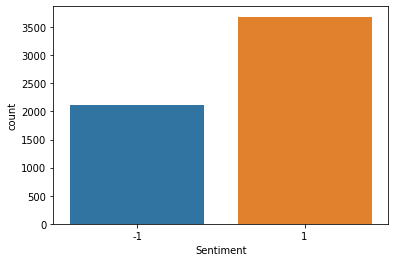

In [9]:
# plot the sentiment column
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(stock_data['Sentiment'])

In [10]:
import re
import nltk 
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

# remove the stopwords
stop_words = set(stopwords.words('english'))

# stemming
stemmer = SnowballStemmer("english")

# function to clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove @mentions
    text = re.sub(r'#', '', text) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # remove RT
    text = re.sub(r'https?:\/\/\S+', '', text) # remove the hyper link
    text = re.sub(r'[^\w\s]', '', text) # remove punctuations
    text = re.sub(r'\d+', '', text) # remove numbers
    text = re.sub(r'\s+', ' ', text) # remove extra spaces
    text = text.strip() # remove leading and trailing spaces
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words]) # stemming and removing stopwords
    return text

In [11]:
# clean the text
stock_data['clean_text'] = stock_data['Text'].apply(clean_text)

In [12]:
stock_data

,Text,Sentiment,clean_text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kicker watchlist xide tit soq pnk cpw bpz aj t...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user aap movi return feage indic trade year aw...
2,user I'd be afraid to short AMZN - they are lo...,1,user id afraid short amzn look like nearmonopo...
3,MNTA Over 12.00,1,mnta
4,OI Over 21.37,1,oi
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,industri bodi cii said discom like suffer net ...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,gold price slip rs investor book profit amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,worker bajaj auto agre wage cut period april t...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,sharemarket live sensex day high point nifti t...


In [13]:
# use stemming to reduce the words to their root form
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stock_data['clean_text'] = stock_data['clean_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [14]:
stock_data

,Text,Sentiment,clean_text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kicker watchlist xide tit soq pnk cpw bpz aj t...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user aap movi return feag indic trade year awesom
2,user I'd be afraid to short AMZN - they are lo...,1,user id afraid short amzn look like nearmonopo...
3,MNTA Over 12.00,1,mnta
4,OI Over 21.37,1,oi
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,industri bodi cii said discom like suffer net ...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,gold price slip rs investor book profit amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,worker bajaj auto agr wage cut period april ti...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,sharemarket live sensex day high point nifti t...


In [15]:
from sklearn.model_selection import train_test_split

X = stock_data['clean_text']
y = stock_data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=900)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

In [18]:
text_clf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [19]:
# Form a prediction set
predictions_svm = text_clf_lsvc.predict(X_test)

In [20]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_svm))

[[ 455  255]
 [ 184 1018]]


In [22]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

          -1       0.71      0.64      0.67       710
           1       0.80      0.85      0.82      1202

    accuracy                           0.77      1912
   macro avg       0.76      0.74      0.75      1912
weighted avg       0.77      0.77      0.77      1912



In [24]:
# print the overall accuracy
print(metrics.accuracy_score(y_test, predictions_svm))


0.770397489539749
